In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel('/content/gdrive/My Drive/Udemy courses/Proper for recording/Store.xls')

In [ ]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [ ]:
df.shape

(9994, 21)

In [ ]:
for col in df.columns:
  print(f'{col} :  {df[col].nunique()}')

Row ID :  9994
Order ID :  5009
Order Date :  1237
Ship Date :  1334
Ship Mode :  4
Customer ID :  793
Customer Name :  793
Segment :  3
Country :  1
City :  531
State :  49
Postal Code :  631
Region :  4
Product ID :  1862
Category :  3
Sub-Category :  17
Product Name :  1850
Sales :  6144
Quantity :  14
Discount :  12
Profit :  7545


In [ ]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [ ]:
ids_dict_ship_mode = {}
for i,key in enumerate(df['Ship Mode'].unique()):
    ids_dict_ship_mode[key] = i

In [ ]:
ids_dict_ship_mode

{'First Class': 2, 'Same Day': 3, 'Second Class': 0, 'Standard Class': 1}

In [ ]:
ids_dict_segment = {}
for i,key in enumerate(df['Segment'].unique()):
    ids_dict_segment[key] = i

In [ ]:
ids_dict_city = {}
for i,key in enumerate(df['City'].unique()):
    ids_dict_city[key] = i

In [ ]:
ids_dict_State = {}
for i,key in enumerate(df['State'].unique()):
    ids_dict_State[key] = i

In [ ]:
ids_dict_Region = {}
for i,key in enumerate(df['Region'].unique()):
    ids_dict_Region[key] = i

In [ ]:
ids_dict_Category  = {}
for i,key in enumerate(df['Category'].unique()):
    ids_dict_Category[key] = i

In [ ]:
ids_dict_Sub_Category  = {}
for i,key in enumerate(df['Sub-Category'].unique()):
    ids_dict_Sub_Category[key] = i

In [ ]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [ ]:
feats = [ 'Ship Mode',
        'Segment', 'City', 'State',
       'Region', 'Category', 'Sub-Category',
      'Sales', 'Quantity', 'Discount', 'Profit']

In [ ]:
df['Ship Mode'] = df['Ship Mode'].map(ids_dict_ship_mode)
df['Segment'] = df['Segment'].map(ids_dict_segment)
df['City'] = df['City'].map(ids_dict_city)
df['State'] = df['State'].map(ids_dict_State)
df['Region'] = df['Region'].map(ids_dict_Region)
df['Category'] = df['Category'].map(ids_dict_Category)
df['Sub-Category'] = df['Sub-Category'].map(ids_dict_Sub_Category)

In [ ]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,0,CG-12520,Claire Gute,0,United States,0,0,42420,0,FUR-BO-10001798,0,0,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,0,CG-12520,Claire Gute,0,United States,0,0,42420,0,FUR-CH-10000454,0,1,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [ ]:
df[feats].head(2)

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,0,0,0,0,0,0,0,261.96,2,0.0,41.9136
1,0,0,0,0,0,0,1,731.94,3,0.0,219.5820


In [ ]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=10)
clf.fit_predict(df[feats])

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
df['score'] = -(clf.negative_outlier_factor_)

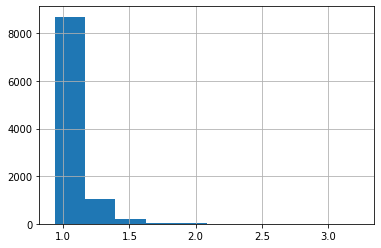

In [ ]:
df['score'].hist()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
minmax = MinMaxScaler(feature_range=(0, 1))
df['Scaled_Scores'] = minmax.fit_transform(np.array(df['score']).reshape(-1,1))

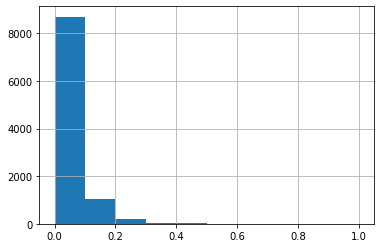

In [ ]:
df['Scaled_Scores'].hist()

In [ ]:
df['Scaled_Scores'] = df['Scaled_Scores'] * 100

In [ ]:
df[df['Scaled_Scores']>=80]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,score,Scaled_Scores
683,684,US-2017-168116,2017-11-04,2017-11-04,3,GT-14635,Grant Thornton,1,United States,140,3,27217,0,TEC-MA-10004125,2,15,Cubify CubeX 3D Printer Triple Head Print,7999.980,4,0.5,-3839.9904,3.233012,100.000000
2697,2698,CA-2014-145317,2014-03-18,2014-03-23,1,SM-20320,Sean Miller,2,United States,108,2,32216,0,TEC-MA-10002412,2,15,Cisco TelePresence System EX90 Videoconferenci...,22638.480,6,0.5,-1811.0784,3.115422,94.883852
5247,5248,US-2015-168914,2015-05-21,2015-05-27,1,JE-15745,Joel Eaton,0,United States,436,10,60423,2,OFF-AP-10000358,1,9,Fellowes Basic Home/Office Series Surge Protec...,20.768,8,0.8,-52.9584,2.885472,84.879166
7772,7773,CA-2016-108196,2016-11-25,2016-12-02,1,CS-12505,Cindy Stewart,0,United States,152,24,43130,3,TEC-MA-10000418,2,15,Cubify CubeX 3D Printer Double Head Print,4499.985,5,0.7,-6599.9780,2.928546,86.753242


## Anomaly detecion using DBSCN

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np
clustering = DBSCAN(eps=3, min_samples=2).fit(df[feats])
clustering.labels_


array([-1, -1,  0, ..., -1, -1, -1])

In [ ]:
df['Label'] = clustering.labels_

In [ ]:
df['Label'] .value_counts()

-1      7625
 11      238
 0       222
 5       120
 4       116
        ... 
 468       2
 476       2
 484       2
 492       2
 507       2
Name: Label, Length: 511, dtype: int64